In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/abalone.csv',index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

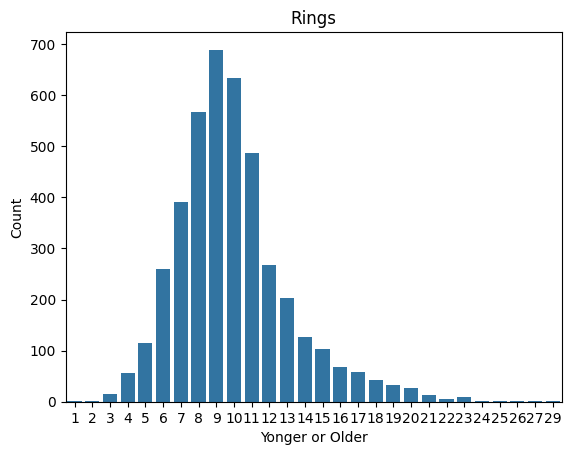

In [3]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Rings 값이 3부터 23 사이인 데이터만 필터링
data = df[(df['Rings'] >= 3) & (df['Rings'] <= 23)]

# Rings의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_rings = sorted(data['Rings'].unique())  # 고유한 값들을 정렬
encoding_map = {ring: idx for idx, ring in enumerate(unique_rings)}  # 재매핑

# 인코딩 적용
df['Rings'] =data['Rings'].map(encoding_map)

# 결과 출력
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             0.1010       

Text(0.5, 1.0, 'Rings')

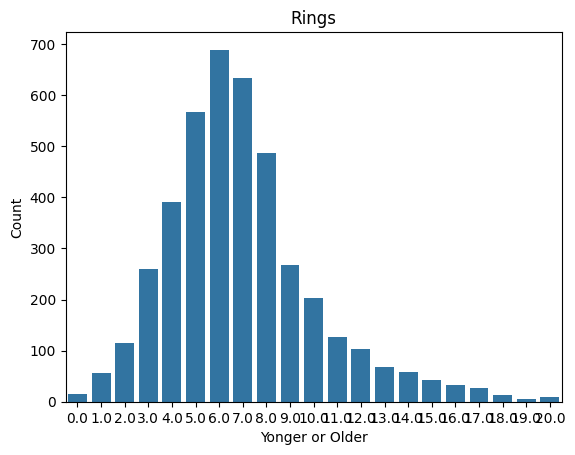

In [6]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
dtype: int64

In [8]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
#sex label encoding
target_label = df['Sex']
target_label.dtype
mapping = {'M':0, 'F':1,'I':2}
df['Sex'] = target_label.map(mapping)
df.head()

C:\Users\akasa\AppData\Local\Temp\ipykernel_13244\2289350990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = target_label.map(mapping)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,12.0
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,4.0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,6.0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,7.0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,4.0


In [20]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(df.isna().sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df).sum())

데이터에 NaN이 있는지 확인:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64
데이터에 무한대 값이 있는지 확인:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [22]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [24]:
#타겟 데이터 분리
X = df.drop('Rings',axis=1)
label_copy = df['Sex']
X = X.drop(columns=['Sex'])
y = df['Rings'].values
print(X)
print(y)

      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
id                                                                             
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.

In [26]:
from sklearn.preprocessing import MinMaxScaler
#scaler 정의
scaler = MinMaxScaler(feature_range=(0,1))
#MinMaxScaler를 X 데이터에 적용
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[0.4893617  0.49107143 0.0840708  ... 0.14944463 0.1323239  0.14670659]
 [0.34042553 0.3125     0.07964602 ... 0.06529788 0.06319947 0.06686627]
 [0.59574468 0.58928571 0.11946903 ... 0.1709862  0.18564845 0.20658683]
 ...
 [0.69503546 0.6875     0.18141593 ... 0.35207001 0.37788018 0.30439122]
 [0.73049645 0.70535714 0.13274336 ... 0.35577247 0.34298881 0.29241517]
 [0.85106383 0.83035714 0.17256637 ... 0.6348031  0.49506254 0.49101796]]


In [28]:
X = X_scaled.tolist()
y = y.tolist()

print(X)
# print(type(X),type(y))
print(y)

[[0.4893617021276596, 0.4910714285714285, 0.084070796460177, 0.1795918367346939, 0.14944463143722653, 0.13232389730085584, 0.1467065868263473], [0.3404255319148936, 0.3125, 0.07964601769911504, 0.07719609582963621, 0.06529787950185123, 0.06319947333772219, 0.06686626746506986], [0.5957446808510639, 0.5892857142857142, 0.11946902654867259, 0.23744454303460516, 0.1709861999326826, 0.1856484529295589, 0.20658682634730538], [0.46808510638297873, 0.4910714285714285, 0.11061946902654868, 0.180301685891748, 0.1433860652978795, 0.14944042132982224, 0.15169660678642713], [0.31205673758865254, 0.29464285714285715, 0.07079646017699115, 0.06992014196983141, 0.05856613934702121, 0.051349572086899276, 0.05189620758483034], [0.44680851063829785, 0.375, 0.084070796460177, 0.12191659272404613, 0.09323460114439582, 0.10138248847926266, 0.11676646706586825], [0.5957446808510639, 0.5803571428571428, 0.13274336283185842, 0.27311446317657495, 0.15785930663076406, 0.1856484529295589, 0.3263473053892215], [0.

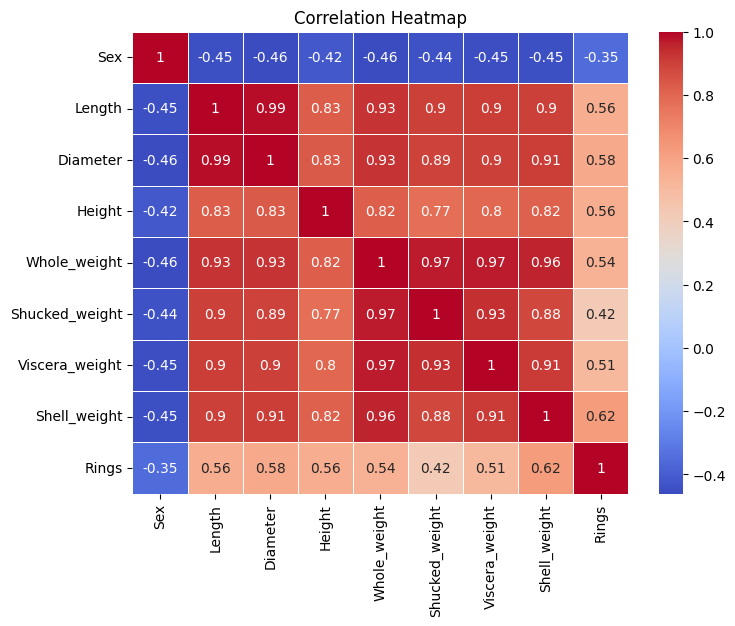

In [30]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
#순환 데이터 생성
window_size = 30

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size]
    _y = y[i + window_size]
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)
print(len(data_X),len(data_y))

[[0.8297872340425532, 0.7857142857142857, 0.18584070796460178, 0.5330967169476486, 0.44530461124200604, 0.5385121790651743, 0.38123752495009977], [0.8297872340425532, 0.8214285714285715, 0.17256637168141595, 0.5879325643300799, 0.48771457421743525, 0.4733377221856484, 0.4411177644710578], [0.9361702127659575, 0.9196428571428571, 0.15486725663716813, 0.7249334516415261, 0.5371928643554359, 0.6919025674786043, 0.3512974051896207], [0.24113475177304972, 0.2232142857142857, 0.06194690265486726, 0.0411712511091393, 0.040727027936721644, 0.02764976958525345, 0.026946107784431135], [0.31205673758865254, 0.25, 0.07079646017699115, 0.046850044365572316, 0.03635139683608213, 0.047399605003291635, 0.04291417165668662], [0.3404255319148936, 0.2857142857142857, 0.06637168141592921, 0.05732031943212068, 0.05452709525412319, 0.046082949308755755, 0.03792415169660678], [0.36879432624113473, 0.3392857142857143, 0.07964601769911504, 0.07453416149068323, 0.06529787950185123, 0.07109940750493746, 0.058383

In [34]:
#data 분리
train_size = int(len(data_y)*0.6)
X_train = np.array(data_X[0:train_size])
y_train = np.array(data_y[0:train_size]).reshape(-1,1)

test_size = int((len(data_y) - train_size) * 0.5)
# val_size = len(data_y) - train_size - test_size
X_test = np.array(data_X[train_size:train_size+test_size])
y_test = np.array(data_y[train_size:train_size+test_size]).reshape(-1,1)

X_val = np.array(data_X[train_size+test_size:len(data_X)])
y_val = np.array(data_y[train_size+test_size:len(data_y)]).reshape(-1,1)

print(f"train : {X_train.shape},{y_train.shape}")
print(f"test : {X_test.shape},{y_test.shape}")
print(f"val : {X_val.shape},{y_val.shape}")

train : (2482, 30, 7),(2482, 1)
test : (828, 30, 7),(828, 1)
val : (828, 30, 7),(828, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
78/78 [==============================] - 3s 21ms/step - loss: 40.8527 - val_loss: 14.1538
Epoch 2/40
78/78 [==============================] - 1s 14ms/step - loss: 13.0503 - val_loss: 7.0652
Epoch 3/40
78/78 [==============================] - 1s 14ms/step - loss: 11.4267 - val_loss: 6.7446
Epoch 4/40
78/7

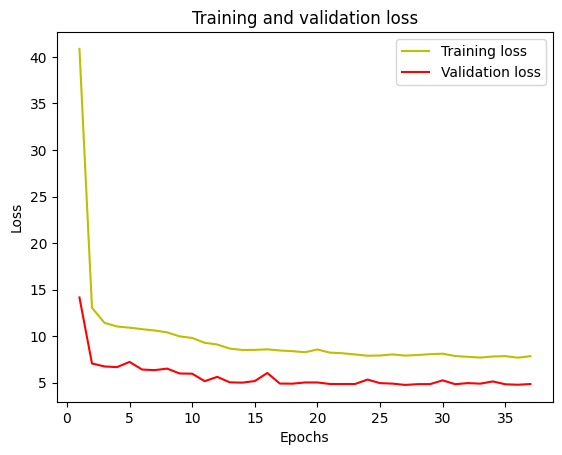

MSE: 4.7601961382971485


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# 모델 생성
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
mse = tf.reduce_mean(tf.square(y_test.reshape(-1,1) - y_pred))

# 손실 그래프 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'MSE: {mse.numpy()}')